## Name of people who have worked on this homework: 
## $Ajinkya, Shibani, Sanivada\ Sai\ Chaitanya, Navya\ Sri\ Kalli$

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from matplotlib import colors
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold
from itertools import product
from collections import OrderedDict
from sklearn.preprocessing import LabelEncoder

from prettytable import PrettyTable
from matplotlib.gridspec import GridSpec

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting random state for the homework to ensure reproducibility
rs = 42

## Part A: Exploratory Data Analysis

##### **1.1** Load in the dataset and examine the dataframe.

In [3]:
# Import the dataset
##https://docs.google.com/spreadsheets/d/1CLAAgePXKkayY_KTCFjK4w5_qbi2FUhM/edit?usp=sharing
! gdown --id "1CLAAgePXKkayY_KTCFjK4w5_qbi2FUhM"

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1CLAAgePXKkayY_KTCFjK4w5_qbi2FUhM
To: /content/oasis_longitudinal_demographics.xlsx
100% 50.7k/50.7k [00:00<00:00, 51.0MB/s]


In [4]:
df = pd.read_excel('/content/oasis_longitudinal_demographics.xlsx')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678.290000,0.736336,1.045710
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1737.620000,0.713402,1.010000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1697.911134,0.701236,1.033623


In [5]:
print(f'Shape of the dataset is {df.shape}')
print(f'Unique datatypes in the dataframe: {" and ".join([str(dt) for dt in df.dtypes.unique().tolist()])}' )

Shape of the dataset is (373, 15)
Unique datatypes in the dataframe: object and int64 and float64


In [6]:
# checking the dtypes
df.dtypes

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV          float64
nWBV          float64
ASF           float64
dtype: object

In [7]:
#Displaying the number and percentage of null values
nullvalues_df=pd.DataFrame({'Columns':df.columns, 'Number of Null values': df.isna().sum(axis=0), 'Percent of Null values':(100*df.isna().sum(axis=0)/df.shape[0]).apply(lambda x: '{:.2f}%'.format(x)) })
nullvalues_df.sort_values(by='Number of Null values', ascending=False)

,Columns,Number of Null values,Percent of Null values
SES,SES,19,5.09%
MMSE,MMSE,2,0.54%
Subject ID,Subject ID,0,0.00%
MRI ID,MRI ID,0,0.00%
Group,Group,0,0.00%
Visit,Visit,0,0.00%
MR Delay,MR Delay,0,0.00%
M/F,M/F,0,0.00%
Hand,Hand,0,0.00%
Age,Age,0,0.00%


##### **1.2** Data Preprocessing

In [8]:
# Dropping observations with null values
df.dropna(inplace=True)

print(f'Shape after cleaning null values is {df.shape}')

Shape after cleaning null values is (354, 15)


In [9]:
#dropping unnecessary columns
df.drop(['Subject ID', 'MRI ID','MR Delay','Hand','Visit'],axis=1,inplace=True)

In [10]:
df.loc[(df.CDR == 0.0), 'CDR'] = "No Dementia"
df.loc[(df.CDR == 0.5), 'CDR'] = "Mild Dementia"
df.loc[(df.CDR == 1.0), 'CDR'] = "Moderate Demntia"
df.loc[(df.CDR == 2.0), 'CDR'] = "Severe Dementia"

In [11]:
df['M/F'] = df['M/F'].replace(['F','M'], [0,1])

## PART C: Over sampling - SMOTE

In [12]:
Y = df['CDR'].values # Target for the model
X = df[['M/F', 'Age', 'EDUC', 'SES', 'MMSE','eTIV','nWBV', 'ASF']]

In [13]:
# splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=rs)

In [14]:
# label encode the target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

Class=2, n=155 (58.491%)
Class=0, n=83 (31.321%)
Class=1, n=24 (9.057%)
Class=3, n=3 (1.132%)


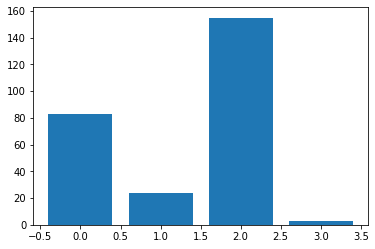

Text(0, 0.5, 'Count')

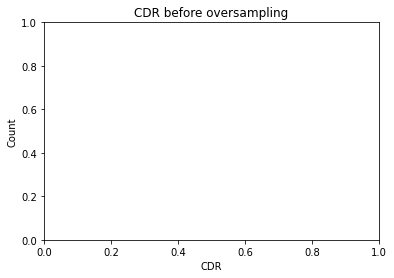

In [16]:
# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()


Class=2, n=155 (25.000%)
Class=0, n=155 (25.000%)
Class=1, n=155 (25.000%)
Class=3, n=155 (25.000%)


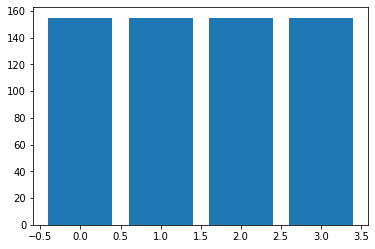

In [ ]:
# transform the dataset
oversample = SMOTE(k_neighbors=1)
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

## Part B: Modeling

**bold text**#### Question 1: Logistic Regression.

In [ ]:
# Build a pipeline
logistic_pipeline= Pipeline([('scaler', StandardScaler()),
                    ('lr', LogisticRegression(random_state= rs))])

In [ ]:
# Hyper-parameters tuning 
param_grid={'lr__C':[x/100 for x in range(1,100,3)]+[10**x for x in range(5)]}

grid_lr = GridSearchCV(logistic_pipeline, param_grid=param_grid, cv=10, scoring='accuracy') 

In [ ]:
# Fit the model
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr',
                                        LogisticRegression(random_state=42))]),
             param_grid={'lr__C': [0.01, 0.04, 0.07, 0.1, 0.13, 0.16, 0.19,
                                   0.22, 0.25, 0.28, 0.31, 0.34, 0.37, 0.4,
                                   0.43, 0.46, 0.49, 0.52, 0.55, 0.58, 0.61,
                                   0.64, 0.67, 0.7, 0.73, 0.76, 0.79, 0.82,
                                   0.85, 0.88, ...]},
             scoring='accuracy')

In [ ]:
import pickle

# filename = 'grid_lr_pkl'
# pickle.dump(grid_lr, open(filename, 'wb'))

In [ ]:
# Get the best parameters
print(f"The best regularization parameter C is {grid_lr.best_params_['lr__C']}")
    

The best regularization parameter C is 10000


In [ ]:
# Checking accuracy

# A function to print test and train accuracy
def print_accuracy(estimator):
    print(f'Accuracy score on the test set is {100*(estimator.score(X_test, y_test)):.2f}%')
    print(f'Accuracy score on the train set is {100*(estimator.score(X_train, y_train)):.2f}%')

print_accuracy(grid_lr)

Accuracy score on the test set is 73.03%
Accuracy score on the train set is 84.35%


In [ ]:
# Generate the report

# A function to generate classification report
def plot_CM(estimator):
    cm_test = classification_report(y_test, estimator.predict(X_test))
    cm_train = classification_report(y_train, estimator.predict(X_train))
    print("Classification report for train data is")
    print(cm_train)
    print("Classification report for test data is")
    print(cm_test)

plot_CM(grid_lr)

Classification report for train data is
              precision    recall  f1-score   support

           0       0.72      0.66      0.69       155
           1       0.91      0.88      0.89       155
           2       0.77      0.84      0.80       155
           3       0.97      0.99      0.98       155

    accuracy                           0.84       620
   macro avg       0.84      0.84      0.84       620
weighted avg       0.84      0.84      0.84       620

Classification report for test data is
              precision    recall  f1-score   support

           0       0.55      0.63      0.59        27
           1       0.50      0.45      0.48        11
           2       0.90      0.84      0.87        51

    accuracy                           0.73        89
   macro avg       0.65      0.64      0.64        89
weighted avg       0.74      0.73      0.73        89



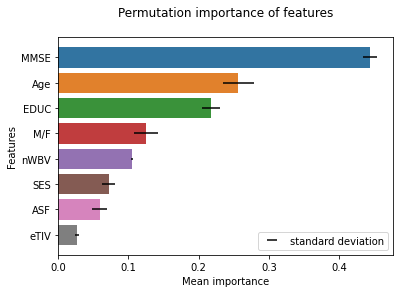

In [ ]:
#lr importance

importances_dict = permutation_importance(grid_lr, X_train,y_train, random_state = rs )
importances_mean_sorted, importances_std_sorted, feature_labels_sorted = zip(*sorted(list(zip(importances_dict['importances_mean'],importances_dict['importances_std'] ,X_train.columns.tolist())), key=lambda x: -x[0]))

# fig = plt.figure(figsize = (8,8))
a = sns.barplot(y = list(feature_labels_sorted), x = list(importances_mean_sorted), orient='h')
plt.errorbar(y = feature_labels_sorted,x = importances_mean_sorted, xerr = importances_std_sorted, color = 'black', fmt='none', label = 'standard deviation' )
# plt.axvline(x=0, color = '#e07a5f', linewidth=1.5)
a.set(xlabel='Mean importance', ylabel="Features")
plt.title('Permutation importance of features in Logistic Regression\n')

plt.xlabel('Mean importance')
plt.ylabel('Features')
plt.legend()
plt.show()

#### Question 2: Decision Tree.

##### **2.1** Fit a decision tree model and find the best `max_depth`.

In [ ]:
## Find optimal depth of trees
depth_score_dict = {}

for max_depth in range(1,20):
    dtree=DecisionTreeClassifier(max_depth=max_depth, random_state=rs)
    mean_score=np.mean(cross_val_score(dtree, X_train, y_train, cv=5))
    depth_score_dict[max_depth] = mean_score

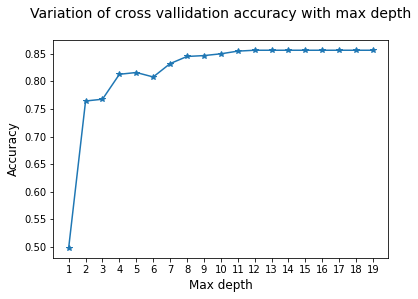

In [ ]:
#Plot the variation of cross validation accuracy wrt max_depth
plt.plot(list(depth_score_dict.keys()), list(depth_score_dict.values()), marker = '*')
plt.xticks(range(1,20))
plt.xlabel('Max depth', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Variation of cross vallidation accuracy with max depth\n', fontsize=14)
plt.show()

In [ ]:
# Find the best depth

best_depth, best_score = sorted(depth_score_dict.items(), key = lambda x: -x[1])[0]
print(f'Best max depth is {best_depth} with a cross validation accuracy of {best_score:.2f}')

Best max depth is 12 with a cross validation accuracy of 0.86


In [ ]:
# Fit a new model wtih best depth found above

dtree_bestdepth = DecisionTreeClassifier(max_depth=best_depth, random_state=rs)
dtree_bestdepth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12, random_state=42)

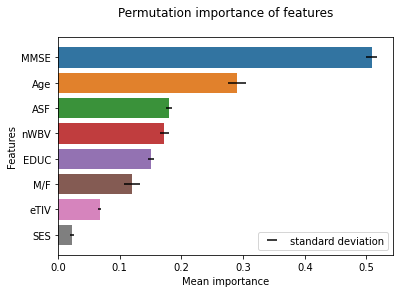

In [ ]:
#lr importance

importances_dict = permutation_importance(dtree_bestdepth, X_train,y_train, random_state = rs )
importances_mean_sorted, importances_std_sorted, feature_labels_sorted = zip(*sorted(list(zip(importances_dict['importances_mean'],importances_dict['importances_std'] ,X_train.columns.tolist())), key=lambda x: -x[0]))

# fig = plt.figure(figsize = (8,8))
a = sns.barplot(y = list(feature_labels_sorted), x = list(importances_mean_sorted), orient='h')
plt.errorbar(y = feature_labels_sorted,x = importances_mean_sorted, xerr = importances_std_sorted, color = 'black', fmt='none', label = 'standard deviation' )
# plt.axvline(x=0, color = '#e07a5f', linewidth=1.5)
a.set(xlabel='Mean importance', ylabel="Features")
plt.title('Permutation importance of features for Decision tree with best depth\n')

plt.xlabel('Mean importance')
plt.ylabel('Features')
plt.legend()
plt.show()

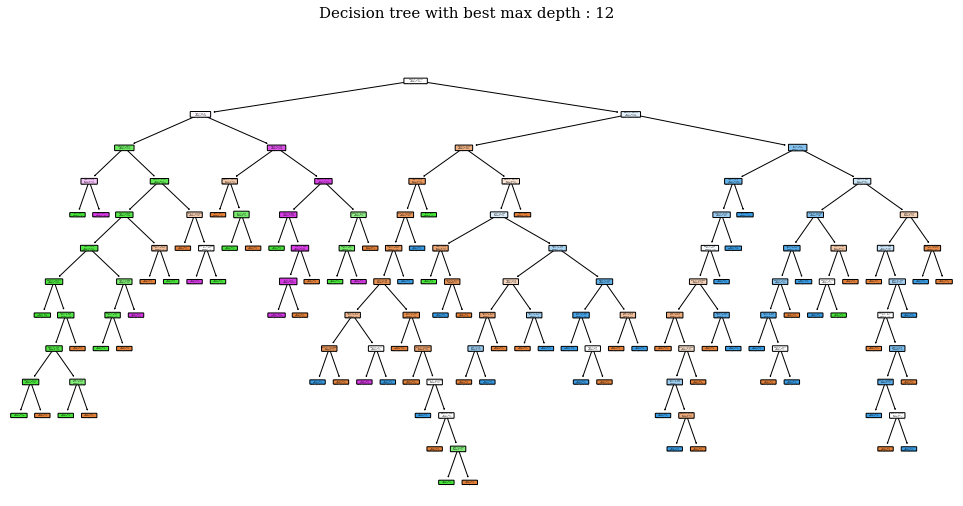

In [ ]:
# Plot the tree

fig = plt.figure(figsize=(17,8))
ax = fig.gca()
tree.plot_tree(dtree_bestdepth, feature_names = X_train.columns.tolist(), filled=True, rounded = True , ax=ax)

fig.suptitle(f'Decision tree with best max depth : {best_depth}', fontsize=15, fontname='serif')
plt.show(fig)

In [ ]:
print_accuracy(dtree_bestdepth)

Accuracy score on the test set is 75.28%
Accuracy score on the train set is 100.00%


In [ ]:
plot_CM(dtree_bestdepth)

Classification report for train data is
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00       155
           2       1.00      1.00      1.00       155
           3       1.00      1.00      1.00       155

    accuracy                           1.00       620
   macro avg       1.00      1.00      1.00       620
weighted avg       1.00      1.00      1.00       620

Classification report for test data is
              precision    recall  f1-score   support

           0       0.57      0.78      0.66        27
           1       0.83      0.45      0.59        11
           2       0.89      0.80      0.85        51

    accuracy                           0.75        89
   macro avg       0.76      0.68      0.70        89
weighted avg       0.79      0.75      0.76        89



##### **2.2** Perform pruning on the fully grown decision tree from 2.1.

In [ ]:
# Full model

dtree_fulldepth = DecisionTreeClassifier(random_state=rs)
dtree_fulldepth.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Compute the alphas

ccp_path = dtree_fulldepth.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = ccp_path['ccp_alphas']

In [ ]:
# Create a dictionary to store all the decision trees for alpha values, and fit a model on each value of ccp_alpha we got from the previous step

dtree_ccp_dict = {}

for ccp_alpha in ccp_alphas:
    dtree_prune = DecisionTreeClassifier(ccp_alpha = ccp_alpha, random_state = rs)
    dtree_prune.fit(X_train, y_train)
    dtree_ccp_dict[ccp_alpha] = dtree_prune

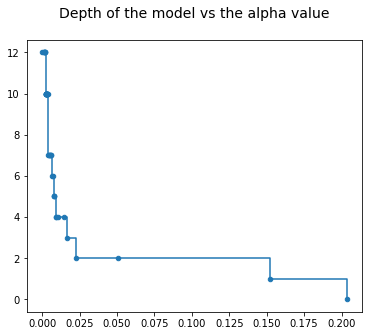

In [ ]:
# Plot depth vs alpha

ccp_depth_dict = {ccp_alpha:dtree_model.tree_.max_depth for ccp_alpha, dtree_model in dtree_ccp_dict.items()}

fig = plt.figure(figsize = (6,5))
plt.step(list(ccp_depth_dict.keys()), list(ccp_depth_dict.values()), where = 'post', marker = '.', markersize = 9)
plt.title('Depth of the model vs the alpha value\n', fontsize = 14)

plt.show(fig)

In [ ]:
# 10 fold cross validation

alphas_and_mean_scores = {}

for ccp_alpha in ccp_alphas:
    dtree_ccp = DecisionTreeClassifier(ccp_alpha = ccp_alpha, random_state = rs)
    mean_score = np.mean(cross_val_score(dtree_ccp, X_train, y_train, cv=10))
    alphas_and_mean_scores[ccp_alpha] = mean_score

In [ ]:
# best_ccp_alpha

best_alpha, best_accuracy = sorted(alphas_and_mean_scores.items(), key = lambda x:-x[1])[0]
print(f'The best ccp_alpha is {best_alpha:.4f} with an averaged 10-fold cv accuracy of {best_accuracy:.4f}')

The best ccp_alpha is 0.0014 with an averaged 10-fold cv accuracy of 0.8484


In [ ]:
# Fit the new model

dtree_bestalpha = DecisionTreeClassifier(ccp_alpha = best_alpha, random_state = rs)
dtree_bestalpha.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001382488479262673, random_state=42)

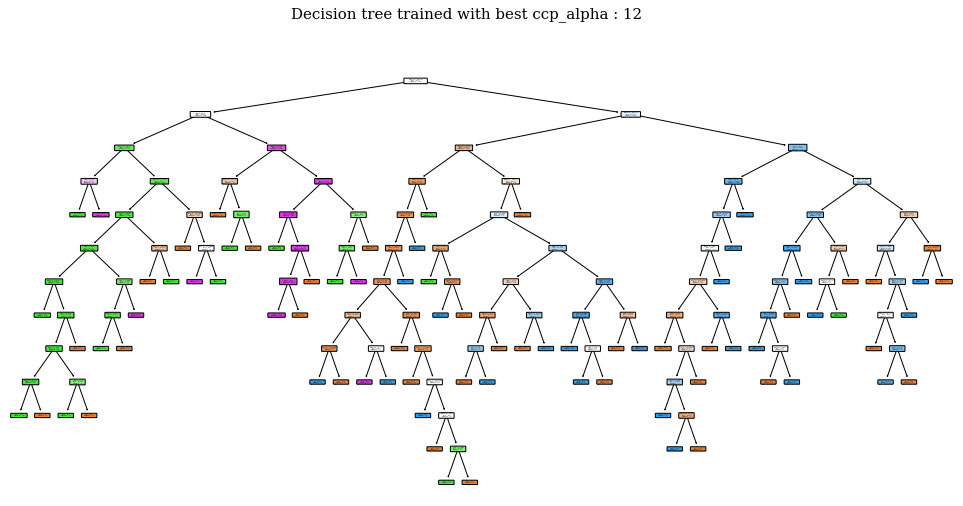

In [ ]:
# Plot the tree

fig = plt.figure(figsize=(17,8))
ax = fig.gca()
tree.plot_tree(dtree_bestalpha, feature_names = X_train.columns.tolist(), filled=True, rounded = True , ax=ax)

fig.suptitle(f'Decision tree trained with best ccp_alpha : {best_depth}', fontsize=15, fontname='serif')
plt.show(fig)

In [ ]:
# Checking accuracy

print_accuracy(dtree_bestalpha)

Accuracy score on the test set is 75.28%
Accuracy score on the train set is 99.84%


In [ ]:
plot_CM(dtree_bestalpha)

Classification report for train data is
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       155
           1       1.00      1.00      1.00       155
           2       0.99      1.00      1.00       155
           3       1.00      1.00      1.00       155

    accuracy                           1.00       620
   macro avg       1.00      1.00      1.00       620
weighted avg       1.00      1.00      1.00       620

Classification report for test data is
              precision    recall  f1-score   support

           0       0.57      0.78      0.66        27
           1       0.83      0.45      0.59        11
           2       0.89      0.80      0.85        51

    accuracy                           0.75        89
   macro avg       0.76      0.68      0.70        89
weighted avg       0.79      0.75      0.76        89



What are the inferences you draw from looking the the accuracy and the confusion matrix?

#### Question 3: Bagging.

In [ ]:
# bagging_parameters

bagging_model = BaggingClassifier(warm_start=True, random_state = rs)

param_grid = {'n_estimators' : range(30,50)}
grid_bag = GridSearchCV(bagging_model, param_grid = param_grid, cv = 10, scoring = 'accuracy')
grid_bag.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=BaggingClassifier(random_state=42, warm_start=True),
             param_grid={'n_estimators': range(30, 50)}, scoring='accuracy')

In [ ]:
# Print the best parameters

best_n_estimators = grid_bag.best_params_['n_estimators']
print(f"The best n_estimators is {best_n_estimators}")

The best n_estimators is 30


In [ ]:
# Checking accuracy

print_accuracy(grid_bag)

Accuracy score on the test set is 74.16%
Accuracy score on the train set is 99.84%


In [ ]:
plot_CM(grid_bag)

Classification report for train data is
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       155
           1       1.00      1.00      1.00       155
           2       1.00      0.99      1.00       155
           3       1.00      1.00      1.00       155

    accuracy                           1.00       620
   macro avg       1.00      1.00      1.00       620
weighted avg       1.00      1.00      1.00       620

Classification report for test data is
              precision    recall  f1-score   support

           0       0.56      0.67      0.61        27
           1       0.78      0.64      0.70        11
           2       0.87      0.80      0.84        51
           3       0.00      0.00      0.00         0

    accuracy                           0.74        89
   macro avg       0.55      0.53      0.54        89
weighted avg       0.77      0.74      0.75        89



What are the inferences you draw from looking the the accuracy and the confusion matrix?

##### **3.2**  Find the most important features using permutation importance.

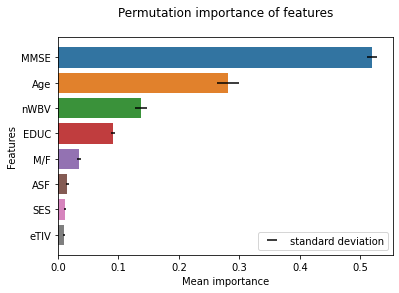

In [ ]:
# Bagging importance

#MR Delay might not be needed
#Names are not proper

importances_dict = permutation_importance(grid_bag, X_train,y_train, random_state = rs )
importances_mean_sorted, importances_std_sorted, feature_labels_sorted = zip(*sorted(list(zip(importances_dict['importances_mean'],importances_dict['importances_std'] ,X_train.columns.tolist())), key=lambda x: -x[0]))

# fig = plt.figure(figsize = (8,8))

a = sns.barplot(y = list(feature_labels_sorted), x = list(importances_mean_sorted), orient='h')
a.set(xlabel='Mean importance', ylabel="Features")
plt.errorbar(y = feature_labels_sorted,x = importances_mean_sorted, xerr = importances_std_sorted, color = 'black', fmt='none', label = 'standard deviation' )

plt.title('Permutation importance of features for bagging\n')
plt.legend()
plt.show()

#### Random Forest.

##### **4.1**  Fit a random forest model and find the best `n_estimators`, `max_depth`, `max_features` using OOB scores.

In [ ]:
param_dict = OrderedDict(n_estimators = (range(10,300,10)), max_features = (range(2, 8)), max_depth=(range(2,10)))

In [ ]:
# Fit the model for all possible combinations of param_dict

params_possible_list = [[n_estimators, max_features, max_depth] for n_estimators in param_dict['n_estimators'] for max_features in param_dict['max_features'] for max_depth in param_dict['max_depth']]

oob_dict = {}

for n_estimators, max_features, max_depth in params_possible_list:
    RF = RandomForestClassifier(n_estimators = n_estimators, max_features = max_features, max_depth = max_depth, random_state = rs, oob_score = True,class_weight="balanced_subsample")
    RF.fit(X_train, y_train)
    oob_dict[(n_estimators, max_features, max_depth)] = RF.oob_score_

In [ ]:
# rf_best_params

best_params, best_score = sorted(oob_dict.items(), key = lambda x: -x[1])[0]

print(f'Best params are n_estimators: {best_params[0]}, max_features: {best_params[1]}, max_depth: {best_params[2]} with best oob score at {best_score:.4f}')

Best params are n_estimators: 220, max_features: 2, max_depth: 9 with best oob score at 0.9226


In [ ]:
# Fit new model

RF_best = RandomForestClassifier(n_estimators = best_params[0], max_features = best_params[1], max_depth = best_params[2], random_state = rs)
RF_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, max_features=2, n_estimators=220,
                       random_state=42)

In [ ]:
# Checking accuracy

print_accuracy(RF_best)

Accuracy score on the test set is 79.78%
Accuracy score on the train set is 100.00%


In [ ]:
plot_CM(RF_best)

Classification report for train data is
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00       155
           2       1.00      1.00      1.00       155
           3       1.00      1.00      1.00       155

    accuracy                           1.00       620
   macro avg       1.00      1.00      1.00       620
weighted avg       1.00      1.00      1.00       620

Classification report for test data is
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        27
           1       0.78      0.64      0.70        11
           2       0.87      0.90      0.88        51

    accuracy                           0.80        89
   macro avg       0.77      0.73      0.75        89
weighted avg       0.80      0.80      0.80        89



##### **4.2**  Find the most important features using permutation importance.

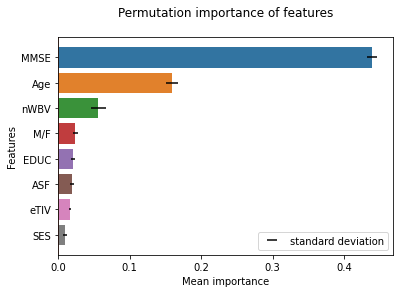

In [ ]:
# RF importance

importances_dict = permutation_importance(RF_best, X_train,y_train, random_state = rs )
importances_mean_sorted, importances_std_sorted, feature_labels_sorted = zip(*sorted(list(zip(importances_dict['importances_mean'],importances_dict['importances_std'] ,X_train.columns.tolist())), key=lambda x: -x[0]))

# fig = plt.figure(figsize = (8,8))
a = sns.barplot(y = list(feature_labels_sorted), x = list(importances_mean_sorted), orient='h')
plt.errorbar(y = feature_labels_sorted,x = importances_mean_sorted, xerr = importances_std_sorted, color = 'black', fmt='none', label = 'standard deviation' )
plt.axvline(x=0, color = '#e07a5f', linewidth=1.5)
a.set(xlabel='Mean importance', ylabel="Features")
plt.title('Permutation importance of features for Random forest \n')

plt.xlabel('Mean importance')
plt.ylabel('Features')
plt.legend()
plt.show()

#### Question 5: Boosting.

In [ ]:
#Build an adaboost model 
dt_base = DecisionTreeClassifier(max_depth = 1)
adaboost = AdaBoostClassifier(base_estimator = dt_base ,random_state=rs)

param_grid = {'n_estimators': range(190,220,2),
              'learning_rate':[0.001, 0.005, 0.01, 0.03, 0.05, 0.08, 0.1, 1, 3]}

grid_boost = GridSearchCV(adaboost, param_grid = param_grid, cv = 10, verbose =2, refit = True)

grid_boost.fit(X_train, y_train)

Fitting 10 folds for each of 135 candidates, totalling 1350 fits
[CV] END ..............learning_rate=0.001, n_estimators=190; total time=   0.4s
[CV] END ..............learning_rate=0.001, n_estimators=190; total time=   0.4s
[CV] END ..............learning_rate=0.001, n_estimators=190; total time=   0.4s
[CV] END ..............learning_rate=0.001, n_estimators=190; total time=   0.4s
[CV] END ..............learning_rate=0.001, n_estimators=190; total time=   0.4s
[CV] END ..............learning_rate=0.001, n_estimators=190; total time=   0.4s
[CV] END ..............learning_rate=0.001, n_estimators=190; total time=   0.4s
[CV] END ..............learning_rate=0.001, n_estimators=190; total time=   0.4s
[CV] END ..............learning_rate=0.001, n_estimators=190; total time=   0.4s
[CV] END ..............learning_rate=0.001, n_estimators=190; total time=   0.4s
[CV] END ..............learning_rate=0.001, n_estimators=192; total time=   0.4s
[CV] END ..............learning_rate=0.001, 

GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                          random_state=42),
             param_grid={'learning_rate': [0.001, 0.005, 0.01, 0.03, 0.05, 0.08,
                                           0.1, 1, 3],
                         'n_estimators': range(190, 220, 2)},
             verbose=2)

In [ ]:
# pickle.dump(grid_boost, open('grid_boost_pkl', 'wb'))

In [ ]:
# Print the best parameters

print(f"The best n_estimators is {grid_boost.best_params_['n_estimators']} and learning_rate is {grid_boost.best_params_['learning_rate']}")

The best n_estimators is 212 and learning_rate is 3


In [ ]:
# Checking accuracy

print_accuracy(grid_boost)

Accuracy score on the test set is 64.04%
Accuracy score on the train set is 70.16%


In [ ]:
plot_CM(grid_boost)

Classification report for train data is
              precision    recall  f1-score   support

           0       0.56      0.64      0.60       155
           1       0.69      0.83      0.76       155
           2       0.67      0.66      0.67       155
           3       0.99      0.67      0.80       155

    accuracy                           0.70       620
   macro avg       0.73      0.70      0.71       620
weighted avg       0.73      0.70      0.71       620

Classification report for test data is
              precision    recall  f1-score   support

           0       0.46      0.59      0.52        27
           1       0.56      0.45      0.50        11
           2       0.80      0.71      0.75        51

    accuracy                           0.64        89
   macro avg       0.60      0.58      0.59        89
weighted avg       0.67      0.64      0.65        89



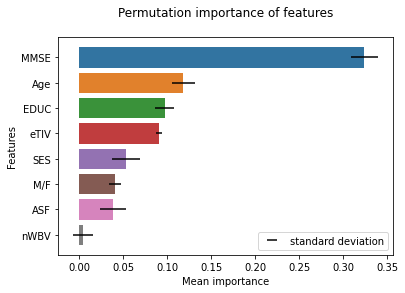

In [ ]:
#adaboost importance

importances_dict = permutation_importance(grid_boost, X_train,y_train, random_state = rs )
importances_mean_sorted, importances_std_sorted, feature_labels_sorted = zip(*sorted(list(zip(importances_dict['importances_mean'],importances_dict['importances_std'] ,X_train.columns.tolist())), key=lambda x: -x[0]))

# fig = plt.figure(figsize = (8,8))
a = sns.barplot(y = list(feature_labels_sorted), x = list(importances_mean_sorted), orient='h')
plt.errorbar(y = feature_labels_sorted,x = importances_mean_sorted, xerr = importances_std_sorted, color = 'black', fmt='none', label = 'standard deviation' )
# plt.axvline(x=0, color = '#e07a5f', linewidth=1.5)
a.set(xlabel='Mean importance', ylabel="Features")
plt.title('Permutation importance of features\n')

plt.xlabel('Mean importance')
plt.ylabel('Features')
plt.legend()
plt.show()

What are the inferences you draw from looking the the accuracy and the confusion matrix?

## Part C: Comparing all models [10 pts]

### Solutions

#### Plot the train and test accuracies as a bar plot along with the confusion matrix for all 6 models.

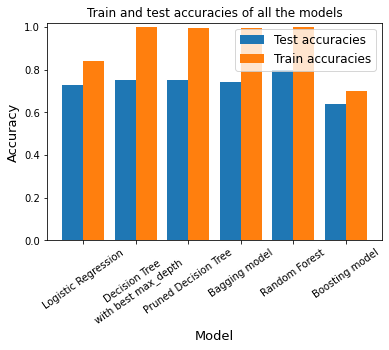

In [ ]:
# Comparing test accuracy performance of all models

models_list = [grid_lr, dtree_bestdepth, dtree_bestalpha, grid_bag, RF_best, grid_boost]
model_names = ['Logistic Regression', 'Decision Tree\nwith best max_depth', 'Pruned Decision Tree', 'Bagging model', 'Random Forest', 'Boosting model']
test_accuracies = [estimator.score(X_test, y_test) for estimator in models_list]
train_accuracies = [estimator.score(X_train, y_train) for estimator in models_list]

fig = plt.figure()
ax = fig.gca()

plt.bar([x-0.4 for x in range(0,12,2)] , test_accuracies, label = 'Test accuracies')
plt.bar([x+0.4 for x in range(0,12,2)] , train_accuracies, label = 'Train accuracies')

plt.xlabel('Model', fontsize = 13)
plt.ylabel('Accuracy', fontsize = 13)
plt.ylim([0.0,1.02])
plt.xticks(range(0,12,2) , model_names,rotation = 35)
plt.legend(fontsize = 12)
plt.title('Train and test accuracies of all the models')
plt.show()

### LIME

In [ ]:
!pip install lime

     |████████████████████████████████| 275 kB 5.2 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=fc62aed9b9933232623d3a52a4dc83e21028d9693e231e86facfd819d1686425
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
import lime
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(X_train.values,
                                 feature_names=X_train.columns,
                                 class_names = [0,1,2,3],
                                 mode='classification')

In [ ]:
# # Here we're actually getting indices from the split call!
# itrain, itest = train_test_split(range(X.shape[0]), train_size=0.80, stratify=df.CDR)
# X_train = X.iloc[itrain, :]
# X_test = X.iloc[itest, :]
# y_train = Y.iloc[itrain]
# y_test = Y.iloc[itest]

In [ ]:
idx = 109

exp = explainer.explain_instance(X_train.values[idx], 
                                 RF_best.predict_proba, 
                                 num_features = 8)

In [ ]:
print('Observation #: %d' % idx)
print('Probability(AHD) =', RF_best.predict_proba(X_train)[idx][1])
print('True class: %s' % y_train[idx])

Observation #: 109
Probability(AHD) = 0.000505050505050505
True class: 2


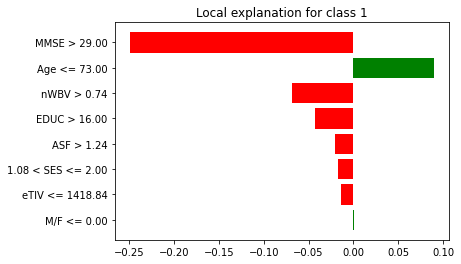

In [ ]:
exp.as_pyplot_figure();

In [ ]:
obs = X_train.iloc[[idx]].copy()
obs['EDUC'] = 14
new_prob = RF_best.predict_proba(obs)[:1]
print('Prediction for new obs', new_prob)
print('Orignal prediction', RF_best.predict_proba(X_train.iloc[[idx]])[:1])

Prediction for new obs [[0.16061333 0.0081162  0.83127048 0.        ]]
Orignal prediction [[5.22997658e-02 5.05050505e-04 9.47195184e-01 0.00000000e+00]]


In [ ]:
idx = 209
exp = explainer.explain_instance(X_train.values[idx], 
                                RF_best.predict_proba, 
                                 num_features = 13)

print('Observation #: %d' % idx)
print('Probability(AHD) =', RF_best.predict_proba(X_train)[idx][1])
print('True class: %s' % y_train[idx])

Observation #: 209
Probability(AHD) = 0.00909090909090909
True class: 2


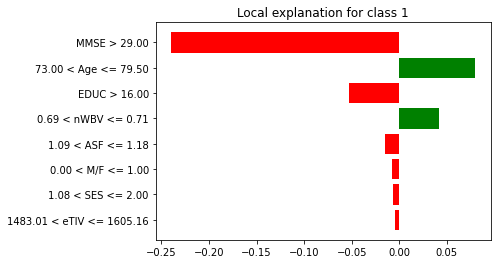

In [ ]:
exp.as_pyplot_figure();

In [ ]:
exp.show_in_notebook(show_table=True, show_all=False)